<a href="https://colab.research.google.com/github/xinruili07/Fashion-MNIST/blob/master/Fashion_MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import json
from getpass import getpass

!pip install -q kaggle
!mkdir /content/.kaggle
!mkdir ~/.kaggle

username = getpass('Enter the username: ')
auth_key = getpass('Enter the authentification key: ')
token = {"username": username,"key": auth_key}
with open("/content/.kaggle/kaggle.json", "w") as file:
    json.dump(token, file)
!chmod 600 /content/.kaggle/kaggle.json
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}
!kaggle competitions download -c mais202-fall2019
!apt install unzip

!unzip /content/{/content}/competitions/mais202-fall2019/test_images.npy.zip -d test_images
!unzip /content/{/content}/competitions/mais202-fall2019/train_images.npy.zip -d train_images

Enter the username: ··········
Enter the authentification key: ··········
- path is now set to: {/content}
  0% 0.00/429k [00:00<?, ?B/s]
100% 429k/429k [00:00<00:00, 64.7MB/s]
 95% 49.0M/51.7M [00:02<00:00, 18.7MB/s]
100% 51.7M/51.7M [00:02<00:00, 22.4MB/s]
  0% 0.00/165k [00:00<?, ?B/s]
100% 165k/165k [00:00<00:00, 52.7MB/s]
 43% 9.00M/20.7M [00:00<00:00, 15.8MB/s]
100% 20.7M/20.7M [00:00<00:00, 32.6MB/s]
  0% 0.00/127 [00:00<?, ?B/s]
100% 127/127 [00:00<00:00, 125kB/s]
Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 28 not upgraded.
Archive:  /content/{/content}/competitions/mais202-fall2019/test_images.npy.zip
  inflating: test_images/test_images.npy  
Archive:  /content/{/content}/competitions/mais202-fall2019/train_images.npy.zip
  inflating: train_images/train_images.npy  


In [0]:
#vanilla CNN
#from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
from keras import backend as K

Using TensorFlow backend.


In [0]:
from sklearn.model_selection import train_test_split
X_train = np.load('/content/train_images/train_images.npy')

X_train = X_train.astype("float32") / 255.0
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
print(X_train.shape)

(50000, 28, 28, 1)


In [0]:
from keras.utils import to_categorical

data = pd.read_csv("/content/{/content}/competitions/mais202-fall2019/train_labels.csv", header=0)
y_train = list(data.label)
y_train = to_categorical(y_train)
print(len(y_train))

50000


In [0]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.20)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import time

NAME = "kaggle-competition-{}".format(int(time.time()))

# tensorboard --logdir='DIRNAME' to view
tensorboard = TensorBoard(log_dir='logs\{}'.format(NAME))

In [0]:
from sklearn.model_selection import train_test_split
print(len(X_train))
print(len(X_valid))

40000
10000


In [0]:
model = Sequential()

model.add(Conv2D(32, (5, 5), padding="same", input_shape=[28, 28, 1], kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (5, 5), padding="same"))
model.add(MaxPooling2D((2,2)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         

In [0]:
import keras
model.compile(keras.optimizers.Adam(5e-4), loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
history = model.fit(X_train, y_train, epochs = 25, shuffle=True, validation_data=(X_valid, y_valid), verbose=1, batch_size=64)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 40000 samples, validate on 10000 samples
Epoch 1/25





40000/40000 [==============================] - 15s 386us/step - loss: 0.9026 - acc: 0.6625 - val_loss: 0.5474 - val_acc: 0.7878
Epoch 2/25
40000/40000 [==============================] - 8s 191us/step - loss: 0.5808 - acc: 0.7850 - val_loss: 0.4708 - val_acc: 0.8210
Epoch 3/25
40000/40000 [==============================] - 7s 186us/step - loss: 0.5142 - acc: 0.8114 - val_loss: 0.4273 - val_acc: 0.8398
Epoch 4/25
40000/40000 [==============================] - 8s 188us/step - loss: 0.4712 - acc: 0.8246 - val_loss: 0.4096 - val_acc: 0.8486
Epoch 5/25
40000/40000 [==============================] - 8s 188us/step - loss: 0.4428 - acc: 0.8370 - val_loss: 0.3897 - val_acc: 0.8539
Epoch 6/25
40000/40000 [==============================] - 8s 188us/step - loss: 0.4176 - acc: 0.8455 - val_loss: 0.3806 - val_acc: 0.8563
Epoch 7/25
40000/40

In [0]:
from sklearn.metrics import confusion_matrix

X_test = np.load('/content/test_images/test_images.npy').squeeze()
X_test = X_test.astype("float32") / 255.0
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
print(X_test.shape)
y_pred = model.predict_classes(X_test)

df_test = pd.read_csv('/content/{/content}/competitions/mais202-fall2019/sample_submission.csv')
df_test['label'] = y_pred
df_test.to_csv('submission.csv', index=False)

(20000, 28, 28, 1)


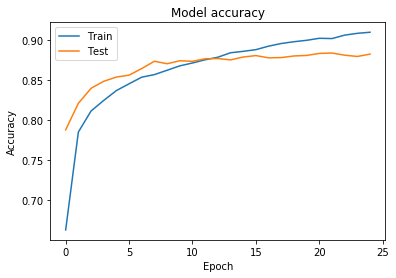

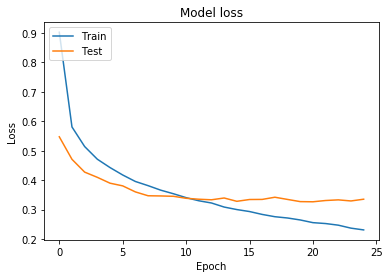

In [0]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()